In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

In [5]:
data = pd.read_csv('../raw_data/test.csv', low_memory=False, index_col='hhid')
data

,mother_alive,father_alive,parents_age,marital_status,parents_level_ed,num_per_house,mobile_phones,individual_water_net,Age abandoned school,subtraction_res,division_res,work_activity_classified
hhid,,,,,,,,,,,,
A208004,1.0,1.0,35.0,1.0,1.0,5.0,1.0,2,1.0,2.0,2.0,1.0
A268006,1.0,1.0,31.0,1.0,3.0,7.0,1.0,2,1.0,2.0,2.0,0.0
A536006,2.0,1.0,36.0,1.0,2.0,4.0,1.0,2,1.0,1.0,2.0,1.0
A266008,1.0,1.0,43.0,1.0,3.0,7.0,2.0,2,1.0,1.0,1.0,0.0
A372007,1.0,1.0,33.0,1.0,3.0,4.0,1.0,2,0.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
A618007,1.0,1.0,37.0,1.0,1.0,5.0,1.0,2,1.0,2.0,2.0,0.0
A571001,1.0,1.0,37.0,1.0,3.0,7.0,2.0,2,1.0,2.0,2.0,0.0
A359007,1.0,2.0,42.0,1.0,1.0,6.0,2.0,2,0.0,2.0,2.0,0.0


In [6]:
data.head()

,mother_alive,father_alive,parents_age,marital_status,parents_level_ed,num_per_house,mobile_phones,individual_water_net,Age abandoned school,subtraction_res,division_res,work_activity_classified
hhid,,,,,,,,,,,,
A208004,1.0,1.0,35.0,1.0,1.0,5.0,1.0,2,1.0,2.0,2.0,1.0
A268006,1.0,1.0,31.0,1.0,3.0,7.0,1.0,2,1.0,2.0,2.0,0.0
A536006,2.0,1.0,36.0,1.0,2.0,4.0,1.0,2,1.0,1.0,2.0,1.0
A266008,1.0,1.0,43.0,1.0,3.0,7.0,2.0,2,1.0,1.0,1.0,0.0
A372007,1.0,1.0,33.0,1.0,3.0,4.0,1.0,2,0.0,2.0,1.0,0.0


In [7]:
X = data.drop("Age abandoned school", axis=1)
y = data["Age abandoned school"]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# X_train.set_index('hhid', inplace=True)
# X_test.set_index('hhid', inplace=True)

oversample = RandomOverSampler(sampling_strategy={0: 1000, 1: 2000})
X_train, y_train = oversample.fit_resample(X_train, y_train)

X_train_num = X_train.select_dtypes(include=["float64","int64"])
X_test_num = X_test.select_dtypes(include=["float64","int64"])

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    ('standard_scaler', StandardScaler())])

pipeline.fit(X_train_num)
X_train_transformed = pipeline.transform(X_train_num)
X_test_transformed = pipeline.transform(X_test_num)

/home/andriigegliuk/.pyenv/versions/3.10.6/envs/dropoutpred-env/lib/python3.10/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (2000) in class 1 will be larger than the number of samples in the majority class (class #1.0 -> 1799)
  warnings.warn(


In [9]:
X_train_transformed

array([[ 1.17571121,  0.7984606 , -0.51097809, ...,  0.87210285,
         0.76576175, -0.79770509],
       [-0.85595395,  0.7984606 ,  0.34792196, ...,  0.87210285,
         0.76576175,  2.1604102 ],
       [-0.85595395,  0.7984606 , -1.36987815, ..., -1.14665375,
        -1.22322981,  0.68135255],
       ...,
       [-0.85595395, -1.27332952, -0.29625308, ..., -1.14665375,
        -1.22322981,  0.68135255],
       [-0.85595395,  0.7984606 ,  0.67000949, ..., -1.14665375,
         0.76576175, -0.79770509],
       [ 1.17571121,  0.7984606 ,  0.8847345 , ..., -1.14665375,
        -1.22322981, -0.79770509]])

In [10]:
X_test_transformed.shape

(594, 11)

In [11]:
from catboost import CatBoostClassifier

catmodel = CatBoostClassifier(
    l2_leaf_reg=1,
    iterations=150,
    custom_loss=['Precision', 'Recall', 'F1', 'Accuracy'],
    auto_class_weights='Balanced',
    loss_function='Logloss',
)

In [12]:
catmodel.fit(
    X_train_transformed, y_train, 
    eval_set=(X_test_transformed, y_test),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [13]:
y_pred_cat = catmodel.predict(X_test_transformed)
y_pred_cat

array([1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 1., 1.

In [14]:
cm_rf = confusion_matrix(y_test, y_pred_cat)
cm_rf

array([[105,  41],
       [221, 227]])

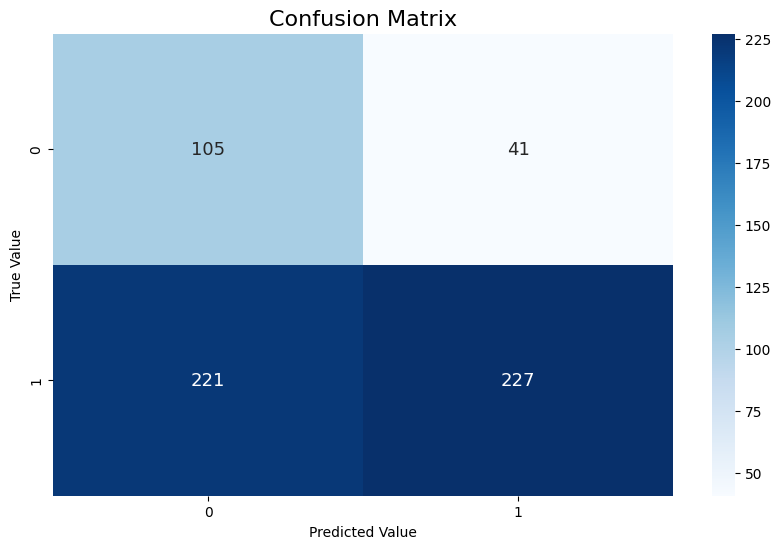

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cm_rf, annot=True, fmt = "g",cmap = "Blues",annot_kws={"size": 13})
sns.set(font_scale=1.2)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix', fontsize = 16)
plt.show()

# Expanation of values:

* 95 cases were correctly identified as "Dropout"
* 49 cases were "Dropout" but were incorrectly classified as "Enrolled"
* 201 cases were "Enrolled" but were incorrectly classified as "Dropout"
* 249 cases were correctly identified as "Enrolled"

# Redefining my X and Y split and use validation data

In [16]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

In [17]:
X

,mother_alive,father_alive,parents_age,marital_status,parents_level_ed,num_per_house,mobile_phones,individual_water_net,subtraction_res,division_res,work_activity_classified
hhid,,,,,,,,,,,
A208004,1.0,1.0,35.0,1.0,1.0,5.0,1.0,2,2.0,2.0,1.0
A268006,1.0,1.0,31.0,1.0,3.0,7.0,1.0,2,2.0,2.0,0.0
A536006,2.0,1.0,36.0,1.0,2.0,4.0,1.0,2,1.0,2.0,1.0
A266008,1.0,1.0,43.0,1.0,3.0,7.0,2.0,2,1.0,1.0,0.0
A372007,1.0,1.0,33.0,1.0,3.0,4.0,1.0,2,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
A618007,1.0,1.0,37.0,1.0,1.0,5.0,1.0,2,2.0,2.0,0.0
A571001,1.0,1.0,37.0,1.0,3.0,7.0,2.0,2,2.0,2.0,0.0
A359007,1.0,2.0,42.0,1.0,1.0,6.0,2.0,2,2.0,2.0,0.0


In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [19]:
val = Pool(data= X_val, label= y_val)

In [20]:
catmodel = CatBoostClassifier(
    l2_leaf_reg=2,
    iterations=200,  
    learning_rate=0.001, 
    depth = 8,
    custom_loss=['Precision', 'Recall', 'F1', 'Accuracy'],
    auto_class_weights='Balanced',
    loss_function='Logloss',
    early_stopping_rounds=20,
    random_state=20
)

In [21]:
catmodel.fit(X_train, y_train, eval_set = val, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [22]:
y_pred = catmodel.predict(X_test)
y_pred

array([1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1.,
       0., 1., 0., 0., 1.

In [23]:
y_test.value_counts()

1.0    448
0.0    146
Name: Age abandoned school, dtype: int64

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[125,  21],
       [212, 236]])

# So now my model is able to predict: 

* 115 students were correctly predicted to dropout
* 21 students were predicted to enrol but they actually dropped out
* 224 students were predicted to dropout but they actually enrolled
* 234 students were correctly predicted as enrolled

In [25]:
score = classification_report(y_test, y_pred, target_names = ['Dropout', 'Enroled'])
print(score)

              precision    recall  f1-score   support

     Dropout       0.37      0.86      0.52       146
     Enroled       0.92      0.53      0.67       448

    accuracy                           0.61       594
   macro avg       0.64      0.69      0.59       594
weighted avg       0.78      0.61      0.63       594



In [26]:
X_test.head()

,mother_alive,father_alive,parents_age,marital_status,parents_level_ed,num_per_house,mobile_phones,individual_water_net,subtraction_res,division_res,work_activity_classified
hhid,,,,,,,,,,,
A316007,2.0,1.0,41.0,1.0,1.0,5.0,1.0,2,2.0,2.0,0.0
A524003,2.0,2.0,57.0,1.0,1.0,7.0,1.0,1,1.0,1.0,1.0
A289002,1.0,2.0,46.0,1.0,3.0,6.0,1.0,2,1.0,1.0,0.0
A396004,1.0,2.0,41.0,1.0,1.0,8.0,1.0,1,1.0,1.0,1.0
A254002,1.0,2.0,47.0,1.0,1.0,7.0,2.0,2,2.0,2.0,2.0


In [27]:
y_prob = catmodel.predict_proba(X_test)
y_prob

array([[0.49609849, 0.50390151],
       [0.50587275, 0.49412725],
       [0.48932638, 0.51067362],
       ...,
       [0.51600355, 0.48399645],
       [0.5195019 , 0.4804981 ],
       [0.51368458, 0.48631542]])